<a href="https://colab.research.google.com/github/BaharehAm/Python-tutorials-for-Advanced-Data-Mining/blob/main/Tutorial_3_Regression%2C_ARIMA_Logistic_Regression%2C_Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Simple Regression model (Regression task)

In [ ]:
import pandas as pd
from google.colab import files

In [ ]:
data_to_load = files.upload()

Saving Sales.csv to Sales.csv


In [ ]:
data = pd.read_csv('Sales.csv')
data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


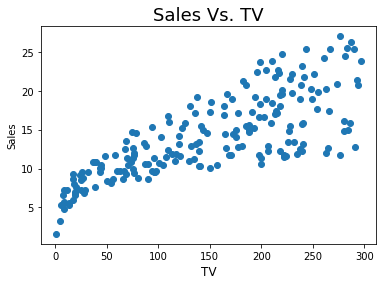

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(data.TV, data.Sales)
# plt.plot(data['Sales'])
plt.title('Sales Vs. TV', fontsize=18)
plt.xlabel('TV', fontsize=12)
plt.ylabel('Sales')
plt.show()

In [ ]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


In [ ]:
x = data[['TV', 'Radio', 'Newspaper']]
y = data[['Sales']]

In [ ]:
#Splitting the dataset
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 100)
# print('length of training set: {}, length of testing set: {}'.format(len(x_train),len(x_test)) )


## split dataset into two parts: Training set, Testing set
x_train = data.iloc[:140, 0:3]
y_train = data.iloc[:140, 3:4]
x_test= data.iloc[140:, 0:3]
y_test = data.iloc[140:, 3:4]
print('length of training set: {}, length of testing set: {}'.format(len(x_train),len(x_test)) )

length of training set: 140, length of testing set: 60


In [ ]:
# with sklearn
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n',list(zip(x, regr.coef_)))

# with statsmodels
import statsmodels.api as sm
x = sm.add_constant(x_train) # adding a constant

model = sm.OLS(y_train, x_train)
model = model.fit()

predictions = model.predict(x_train)
predictions

print_model = model.summary()
print(print_model)

Intercept: 
 [3.04514221]
Coefficients: 
 [('TV', array([ 0.04704868,  0.17968299, -0.00300557]))]
                                 OLS Regression Results                                
Dep. Variable:                  Sales   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2411.
Date:                Sat, 28 Jan 2023   Prob (F-statistic):                   2.61e-118
Time:                        02:03:07   Log-Likelihood:                         -299.67
No. Observations:                 140   AIC:                                      605.3
Df Residuals:                     137   BIC:                                      614.2
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
#Prediction on test set
y_pred= model.predict(x_test)
y_pred


140     7.895692
141    19.442425
142    19.851620
143     7.505168
144     9.077138
145     8.249146
146    14.885946
147    24.605027
148    10.963306
149     8.338777
150    18.978167
151     9.210175
152    16.090523
153    18.550627
154    15.005016
155     2.815861
156    15.322121
157     8.879263
158     9.305123
159    11.734832
160    13.848370
161    13.192558
162    14.641505
163    17.025312
164     9.686410
165    14.922221
166     9.428915
167    12.772174
168    17.807740
169    17.987495
170     5.532428
171    14.273322
172     5.675833
173    10.971984
174    13.141903
175    26.393877
176    20.461560
177    11.570502
178    16.049468
179    11.518592
180     9.283727
181    13.581924
182     4.775964
183    26.175501
184    18.989183
185    21.282949
186     8.522403
187    16.960883
188    18.750560
189     4.000485
190    11.123209
191     6.566164
192     2.320235
193    18.268884
194    15.987377
195     3.109233
196     6.352422
197    11.818821
198    25.6531

In [ ]:
y_pred.shape

(60,)

In [ ]:
y_test.Sales

140    10.9
141    19.2
142    20.1
143    10.4
144    11.4
145    10.3
146    13.2
147    25.4
148    10.9
149    10.1
150    16.1
151    11.6
152    16.6
153    19.0
154    15.6
155     3.2
156    15.3
157    10.1
158     7.3
159    12.9
160    14.4
161    13.3
162    14.9
163    18.0
164    11.9
165    11.9
166     8.0
167    12.2
168    17.1
169    15.0
170     8.4
171    14.5
172     7.6
173    11.7
174    11.5
175    27.0
176    20.2
177    11.7
178    11.8
179    12.6
180    10.5
181    12.2
182     8.7
183    26.2
184    17.6
185    22.6
186    10.3
187    17.3
188    15.9
189     6.7
190    10.8
191     9.9
192     5.9
193    19.6
194    17.3
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, dtype: float64

In [ ]:
# #Actual value and the predicted value
# pred_actual = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred})
# pred_actual.head()



# Actual value and the predicted value

# y_pred = y_pred.reshape(-1,)
# y_pred.shape

# y_pred=y_pred[:,0]
# y_pred.shape

pred_actual = pd.DataFrame({'Actual value': y_test.Sales, 'Predicted value': y_pred})
pred_actual.head()

,Actual value,Predicted value
140,10.9,7.895692
141,19.2,19.442425
142,20.1,19.851620
143,10.4,7.505168
144,11.4,9.077138


In [ ]:
#Model Evaluation
from sklearn import metrics
import numpy as np
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(meanSqErr)
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 1.5054879883236036
Mean Square Error: 3.6728247836055186
Root Mean Square Error: 1.9164615267741532


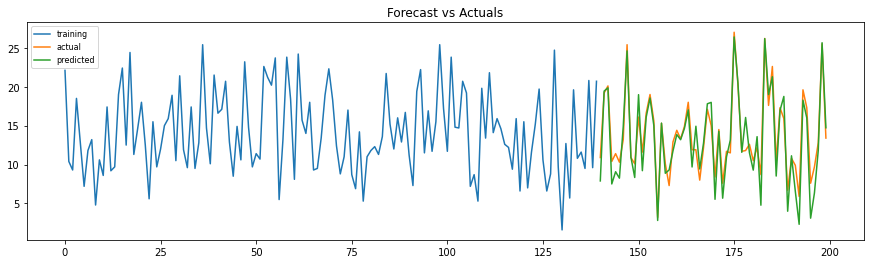

In [ ]:
# Make as pandas series
y_pred = pd.Series(y_pred, index=y_test.index)

# Plot
plt.figure(figsize=(15,4))
plt.plot(y_train, label='training')
plt.plot(y_test, label='actual')
plt.plot(y_pred, label='predicted')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## Regression with time component

In [ ]:
data_to_load = files.upload()

Saving aus_airpassengers.csv to aus_airpassengers.csv


In [ ]:
data = pd.read_csv('aus_airpassengers.csv')
data.head()

,Time,Year,Passengers
0,1,1970,7.3187
1,2,1971,7.3266
2,3,1972,7.7956
3,4,1973,9.3846
4,5,1974,10.6647


In [ ]:
data['Time2']=data['Time']**2
data.head()


data = data.iloc[:, [0,3,1,2]]
data.head()

,Time,Time2,Year,Passengers
0,1,1,1970,7.3187
1,2,4,1971,7.3266
2,3,9,1972,7.7956
3,4,16,1973,9.3846
4,5,25,1974,10.6647


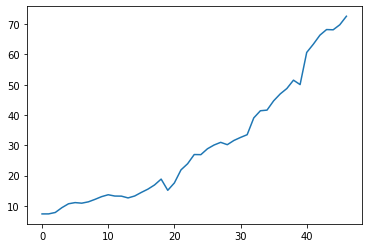

In [ ]:
plt.plot(data['Passengers'])

In [ ]:
data.corr()

,Time,Time2,Year,Passengers
Time,1.000000,0.969549,1.000000,0.954495
Time2,0.969549,1.000000,0.969549,0.994308
Year,1.000000,0.969549,1.000000,0.954495
Passengers,0.954495,0.994308,0.954495,1.000000


In [ ]:
## split dataset into two parts: Training set, Testing set
x_train = data.iloc[:30, 1:3]
y_train = data.iloc[:30, 3:4]
x_test= data.iloc[30:, 1:3]
y_test = data.iloc[30:, 3:4]
print('length of training set: {}, length of testing set: {}'.format(len(x_train),len(x_test)) )


# with statsmodels
import statsmodels.api as sm
x = sm.add_constant(x_train) # adding a constant

model = sm.OLS(y_train, x_train).fit()


print_model = model.summary()
print(print_model)

length of training set: 30, length of testing set: 17
                                 OLS Regression Results                                
Dep. Variable:             Passengers   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              1985.
Date:                Fri, 27 Jan 2023   Prob (F-statistic):                    6.82e-31
Time:                        23:07:45   Log-Likelihood:                         -56.223
No. Observations:                  30   AIC:                                      116.4
Df Residuals:                      28   BIC:                                      119.2
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
# Actual value and the predicted value
y_pred = model.predict(x_test)

pred_actual = pd.DataFrame({'Actual value': y_test.Passengers, 'Predicted value': y_pred})
pred_actual.head()

,Actual value,Predicted value
30,32.577569,34.710731
31,33.477398,36.415922
32,39.021581,38.175107
33,41.386432,39.988287
34,41.596552,41.855460


In [ ]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(y_test, y_pred)
meanSqErr = metrics.mean_squared_error(y_test, y_pred)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 3.227824344738746
Mean Square Error: 16.274852312630426
Root Mean Square Error: 4.03421024645846


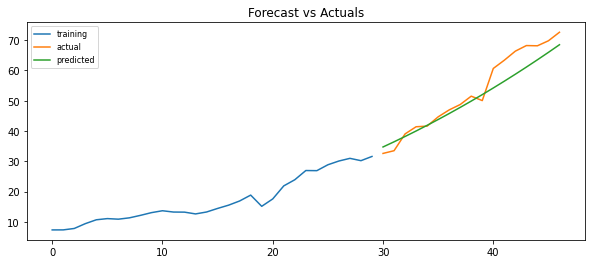

In [ ]:
# Plot

plt.figure(figsize=(10,4))
plt.plot(y_train, label='training')
plt.plot(y_test, label='actual')
plt.plot(y_pred, label='predicted')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

## ARIMA model for time series data (Regression task)

ARIMA model explains a given time series based on its own past values, that is, its own lags and the lagged forecast errors, so that equation can be used to forecast future values.

In [ ]:
data_to_load = files.upload()

Saving AirPassengers.csv to AirPassengers.csv


In [ ]:
data = pd.read_csv('AirPassengers.csv')
data

,Month,Passengers
0,Jan-49,112
1,Feb-49,118
2,Mar-49,132
3,Apr-49,129
4,May-49,121
...,...,...
139,Aug-60,606
140,Sep-60,508
141,Oct-60,461
142,Nov-60,390


length of dataset: 144
length of training set: 132, length of testing set: 12


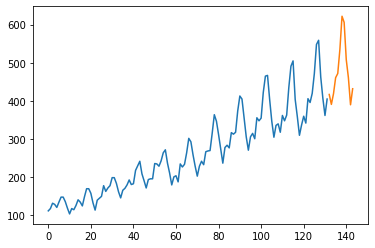

In [ ]:
## split dataset into two parts: Training set, Testing set
TS = data['Passengers']
print('length of dataset: {}'.format(len(TS)))

train, test = TS[:len(TS)-12], TS[len(TS)-12:]
print('length of training set: {}, length of testing set: {}'.format(len(train),len(test)) )

plt.plot(train)
plt.plot(test)
plt.show()

### Select ARIMA orders manually

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(train)
result


print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: 0.888027
p-value: 0.992932


if P Value > 0.05 we go ahead with finding the order of differencing

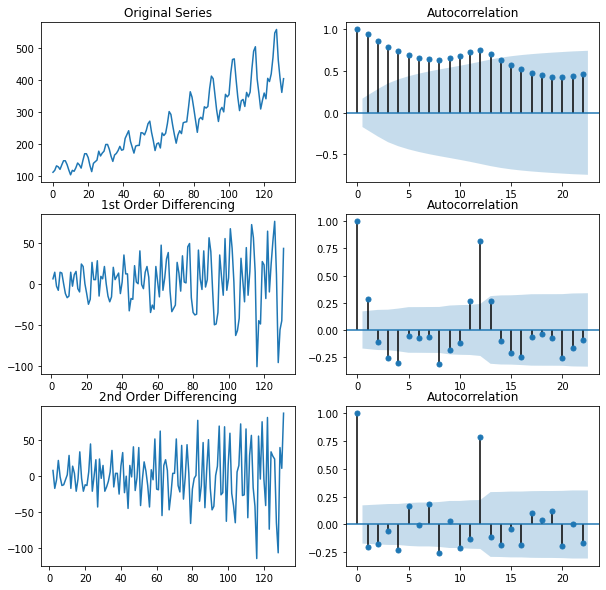

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Original Series
fig, axes = plt.subplots(3, 2, figsize=(10, 10))

axes[0, 0].plot(train)
axes[0, 0].set_title('Original Series')
plot_acf(train, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(train.diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(train.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(train.diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(train.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [ ]:
result = adfuller(train.diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


result = adfuller(train.diff().diff().dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.402920
p-value: 0.140914
ADF Statistic: -14.252871
p-value: 0.000000


/usr/local/lib/python3.8/dist-packages/statsmodels/regression/linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


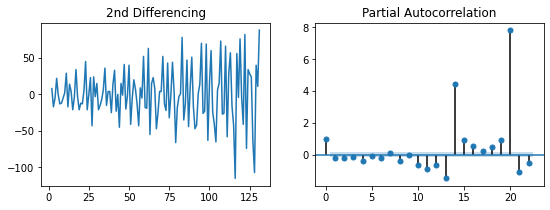

In [ ]:
# PACF plot of 2nd differenced series

fig, axes = plt.subplots(1, 2, figsize = (9,3))
axes[0].plot(train.diff().diff()); axes[0].set_title('2nd Differencing')
plot_pacf(train.diff().diff().dropna(), ax=axes[1])
plt.show()

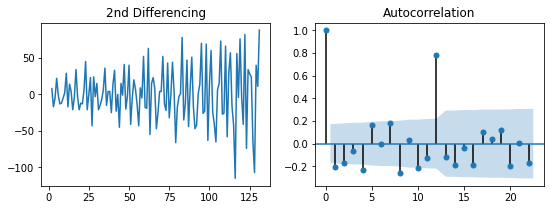

In [ ]:
fig, axes = plt.subplots(1, 2, figsize = (9,3))
axes[0].plot(train.diff().diff()); axes[0].set_title('2nd Differencing')
plot_acf(train.diff().diff().dropna(), ax=axes[1])

plt.show()

In [ ]:
# train the ARIMA model
from statsmodels.tsa.arima_model import ARIMA

# 1,2,2 ARIMA Model
model = ARIMA(train, order=(1,2,2))
model = model.fit(disp=0)
print(model.summary())

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:          D2.Passengers   No. Observations:                  130
Model:                 ARIMA(1, 2, 2)   Log Likelihood                -623.166
Method:                       css-mle   S.D. of innovations             28.619
Date:                Sat, 28 Jan 2023   AIC                           1256.331
Time:                        02:05:28   BIC                           1270.669
Sample:                             2   HQIC                          1262.157
                                                                              
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.0025      0.082      0.030      0.976      -0.159       0.164
ar.L1.D2.Passengers    -0.5411      0.098     -5.503      0.000      -0.734      -0.348
ma.L1.D2.Passeng

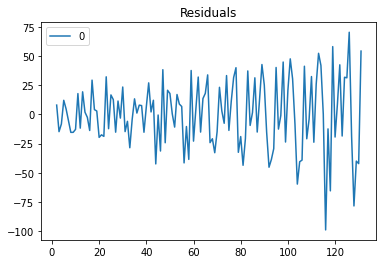

In [ ]:
# Plot residuals
residuals = pd.DataFrame(model.resid)
residuals.plot(title="Residuals")
plt.show()

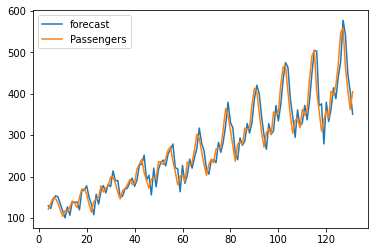

In [ ]:
# Actual vs Fitted plot (training set)
model.plot_predict(dynamic=False)
plt.show()

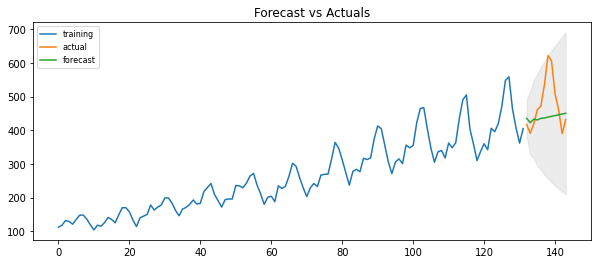

In [ ]:
## make predictions
forecasts = model.forecast(12, alpha=0.05)  # 95% conf
forecasts

forecast_values = forecasts[0]
lower_band = forecasts[2][:, 0]
upper_band = forecasts[2][:, 1]


# Make as pandas series
forecast_values = pd.Series(forecast_values, index=test.index)
upper_band = pd.Series(upper_band, index=test.index)
lower_band = pd.Series(lower_band, index=test.index)

# Plot
plt.figure(figsize=(10,4))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forecast_values, label='forecast')
plt.fill_between(lower_band.index, lower_band, upper_band, color='gray', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()




In [ ]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(test, forecast_values)
meanSqErr = metrics.mean_squared_error(test, forecast_values)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test, forecast_values))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 61.0718535422989
Mean Square Error: 6841.270827966121
Root Mean Square Error: 82.71197511827486


### Auto-ARIMA

In [ ]:
!pip install pmdarima
from pmdarima.arima import auto_arima

In [ ]:
model = auto_arima(train, start_p=1, start_q=1,
                      test='adf',
                      max_p=5, max_q=5,
                      m=1,
                      d=1,
                      seasonal=False,
                      start_P=0,
                      D=None,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)

model.summary()

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1258.440, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1277.589, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1268.313, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1264.738, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1276.259, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.89 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1262.608, Time=0.27 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1263.896, Time=0.16 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=1218.683, Time=0.71 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.51 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.81 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.59 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.35 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  132
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -603.341
Date:                Sat, 28 Jan 2023   AIC                           1218.683
Time:                        02:06:24   BIC                           1235.934
Sample:                             0   HQIC                          1225.692
                                - 132                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7157      0.212      3.379      0.001       0.301       1.131
ar.L1          1.6431      0.028     57.904      0.000       1.587       1.699
ar.L2         -0.9129      0.027    -33.338      0.000      -0.967      -0.859
ma.L1         -1.8478      0.036    -51.463      0.000      -1.918      -1.777
ma.L2          0.9466      0.038     24.988      0.000       0.872       1.021
sigma2       564.8457     67.205      8.405      0.000     433.126     696.565
===================================================================================
Ljung-Box (L1) (Q):                   0.85   Jarque-Bera (JB):                 1.87
Prob(Q):                              0.36   Prob(JB):                         0.39
Heteroskedasticity (H):               6.40   Skew:                             0.26
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
# Forecast
forecasts = model.predict(n_periods=12, return_conf_int=True)
forecasts

(132    415.820714
 133    442.382138
 134    476.861375
 135    509.980139
 136    533.635312
 137    542.983279
 138    537.463145
 139    520.575117
 140    498.582276
 141    478.579827
 142    466.507939
 143    465.649348
 dtype: float64, array([[369.23761024, 462.4038168 ],
        [382.863368  , 501.90090802],
        [413.07317806, 540.6495724 ],
        [445.63105703, 574.32922186],
        [469.24117841, 598.02944628],
        [478.1983754 , 607.76818334],
        [472.49561682, 602.43067312],
        [455.53511048, 585.61512375],
        [432.02939062, 565.13516212],
        [407.4956377 , 549.66401579],
        [388.24170082, 544.77417758],
        [379.66147383, 551.63722129]]))

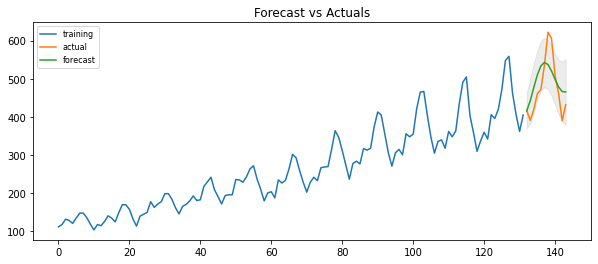

In [ ]:

forecast_values = forecasts[0]
lower_band = forecasts[1][:, 0]
upper_band = forecasts[1][:, 1]


# Make as pandas series
forecast_values = pd.Series(forecast_values, index=test.index)
upper_band = pd.Series(upper_band, index=test.index)
lower_band = pd.Series(lower_band, index=test.index)

# Plot
plt.figure(figsize=(10,4))
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(forecast_values, label='forecast')
plt.fill_between(lower_band.index, lower_band, upper_band, color='gray', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

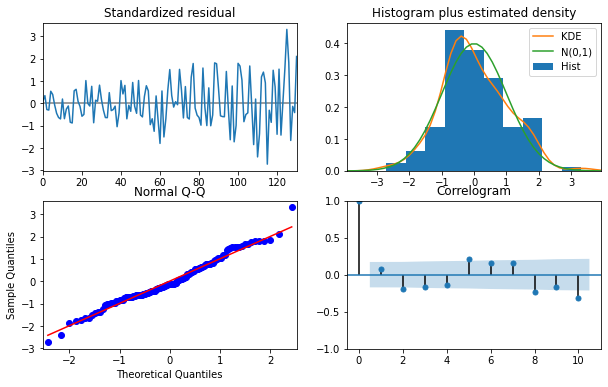

In [ ]:
model.plot_diagnostics(figsize=(10,6))
plt.show()

In [ ]:
#Model Evaluation
meanAbErr = metrics.mean_absolute_error(test, forecast_values)
meanSqErr = metrics.mean_squared_error(test, forecast_values)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(test, forecast_values))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

Mean Absolute Error: 44.67817549415878
Mean Square Error: 2839.8774797689966
Root Mean Square Error: 53.29050083991515


## Logistic Regression (LR) and Naive Bayes (NB) models (Classification task)

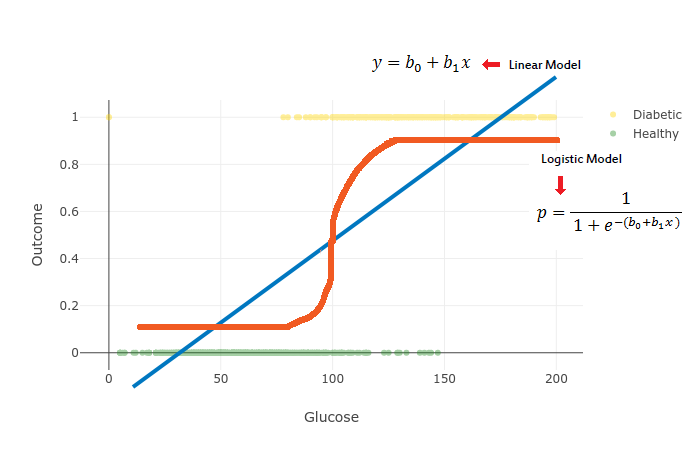


In [ ]:

## Load the dataset and create a dataframe
data_to_load = files.upload()
df = pd.read_csv('diabetes.csv')
df.head(10)


## Replace the zeros with "NaN"
import numpy as np
df[["BMI"]]=df[["BMI"]].replace(0,np.NaN)
df[["Insulin"]]=df[["Insulin"]].replace(0,np.NaN)

## Replace the "NaN" values with the mean
df['BMI'].fillna(df['BMI'].mean(), inplace=True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace=True)


## Normalize the numeric features
from sklearn.preprocessing import StandardScaler
SC = StandardScaler()
X_to_be_SC = df.drop(['Outcome','Social smoker','Social drinker'], axis=1)
X_CS = SC.fit_transform(X_to_be_SC)
X_CS
X_to_be_SC.columns
X_SC = pd.DataFrame(X_CS, columns=X_to_be_SC.columns)
X_SC.head()


## Specify the feature and target datasets [X and y]
X = pd.concat([X_SC, df[['Social smoker','Social drinker']] ], axis=1 )
y = df[['Outcome']]


## Split the dataset into training, validation, and test sets  (50,30,20 ratios)
random_state=32  # This is to make sure that each time we run the code, the same data points are asssigned to the sub-sets.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_state, stratify=y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.3/0.8, random_state=random_state, stratify=y_train)
# The reason that we set a value for "stratify" parameter is to have the same proportion of outcomes in training, validation, and test sets.

print("The size of Training set is: %s (%.f percent of total) " %(len(X_train),len(X_train)/len(df)*100))
print("The size of Validation set is: %s (%.f percent of total) " %(len(X_valid),len(X_valid)/len(df)*100))
print("The size of Test set is: %s (%.f percent of total) " %(len(X_test),len(X_test)/len(df)*100))


,Pregnancies,Glucose,Pressure,Insulin,BMI,DPF,Age,Social smoker,Social drinker,Outcome
0,0,86,68,155.362007,35.8,0.238,25,1,0,0
1,0,161,50,155.362007,21.9,0.254,65,0,1,0
2,0,121,66,165.000000,34.3,0.203,33,0,0,1
3,0,117,80,53.000000,45.2,0.089,24,1,1,0
4,0,162,76,100.000000,53.2,0.759,25,1,1,1
5,0,124,70,155.362007,27.4,0.254,36,0,0,1
6,0,93,60,92.000000,28.7,0.532,22,1,1,0
7,0,91,80,155.362007,32.4,0.601,27,0,1,0
8,0,152,82,272.000000,41.5,0.270,27,0,1,0
9,0,109,88,155.362007,32.5,0.855,38,0,0,1


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [ ]:

## Hyper-parameter tuning
c_set = np.logspace(-2, 2, 10)

Valid_Acc_list = []
for c in c_set:
    LR = LogisticRegression(C = c, random_state=0)
    LR.fit(X_train, np.ravel(y_train))
    Valid_Acc_list.append(LR.score(X_valid, y_valid))

best_param = c_set[np.argmax(Valid_Acc_list)]
best_valid_acc = max(Valid_Acc_list)

print(round(best_param, 5) , round(best_valid_acc, 5))

0.07743 0.76667


In [ ]:
## initialize the validated model
LR = LogisticRegression(C = best_param, random_state=0)
gnb = GaussianNB()


## Re-train the validated model on the training set
LR.fit(X_train, np.ravel(y_train))
gnb.fit(X_train, np.ravel(y_train))

## Evaluate the model on test set
y_pred_LR = LR.predict(X_test)
y_pred_gnb = gnb.predict(X_test)


LR.predict_proba(X_test)

accuracy_LR = LR.score(X_test,y_test)
accuracy_gnb = gnb.score(X_test,y_test)

from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred_LR))
print(classification_report(y_test, y_pred_LR))
print(confusion_matrix(y_test, y_pred_gnb))
print(classification_report(y_test, y_pred_gnb))


[[65  2]
 [14 19]]
              precision    recall  f1-score   support

           0       0.82      0.97      0.89        67
           1       0.90      0.58      0.70        33

    accuracy                           0.84       100
   macro avg       0.86      0.77      0.80       100
weighted avg       0.85      0.84      0.83       100

[[61  6]
 [13 20]]
              precision    recall  f1-score   support

           0       0.82      0.91      0.87        67
           1       0.77      0.61      0.68        33

    accuracy                           0.81       100
   macro avg       0.80      0.76      0.77       100
weighted avg       0.81      0.81      0.80       100

